In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from matplotlib import gridspec

In [2]:
# import river modules
from river import datasets
from river import evaluate
from river import metrics
from river import optim
from river import preprocessing
from river import linear_model
from river import drift

#### ADWIN Drift detector without Warnings

In [3]:
# Initialize Dataset
dataset = datasets.synth.Agrawal(
     classification_function=5,
     seed=42
)

# Loading model pickle file
LRmodel = pickle.load(open('../saved_models/classification/model.pkl', 'rb'))

# Initialie the ADWIN drift detector
drift_detector = drift.ADWIN(delta=1)
drifts = list()
correctly_classified_data = list()

# Initialise metric
metric = metrics.Accuracy()

for i,data in enumerate(dataset.take(16000)):
    # data[0] - features, data[1] - label
    
    # Data is processed one sample at a time
    y_pred = LRmodel.predict_one(data[0])
    metric = metric.update(data[1],y_pred)
    correctly_classified = y_pred == data[1]
    correctly_classified_data.append(correctly_classified)
    drift_detector.update(correctly_classified)   
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)

print(f'{metric}')

Change detected at index 639
Change detected at index 831
Change detected at index 1407
Change detected at index 1855
Change detected at index 2079
Accuracy: 61.89%


In [4]:
drifts

[639, 831, 1407, 1855, 2079]

In [5]:
# Function to return datastream samples with a rolling average mean window
def moving_average(datastream, window_size):

    datastream_series = pd.Series(datastream)
    windows = datastream_series.rolling(window_size)
    moving_averages = windows.mean()

    return moving_averages.tolist()[window_size - 1:]

In [6]:
new_data_stream = moving_average(correctly_classified_data,100)

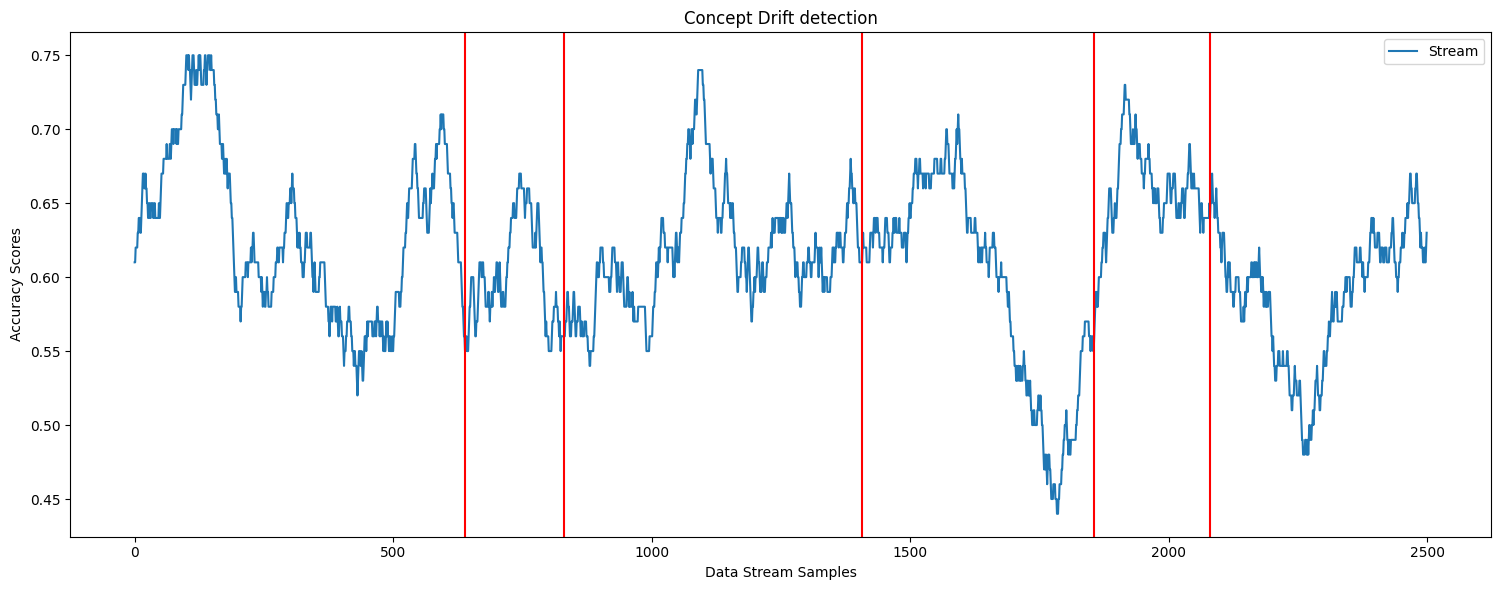

In [7]:
# Plot Drift using ADWIN
def plot_data(data_stream, drifts=None):
    fig = plt.figure(figsize=(20,6), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax = plt.subplot(gs[0])
    ax.plot(data_stream, label='Stream')
    if drifts is not None:
        for drift_detected in drifts:
            ax.axvline(drift_detected, color='red')
    plt.xlabel('Data Stream Samples')
    plt.ylabel('Accuracy Scores')
    plt.title('Concept Drift detection')
    plt.legend()
    plt.show()

plot_data(new_data_stream[:2500], drifts)

#### Drift detection with Warning

In [8]:
# Initialize Dataset
dataset = datasets.synth.Agrawal(
     classification_function=5,
     seed=42
)

# Load model pickle file
LRmodel = pickle.load(open('../saved_models/classification/model.pkl', 'rb'))

# Initialize Warning and Drift detectors
warning_detector = drift.ADWIN(delta=1.5)
drift_detector = drift.ADWIN(delta=1)

# Lists to store drifts, warnings and correctly_classified_data
drifts1, warnings1, correctly_classified_data1 = list(), list(), list()

# Initialize metrics
metric = metrics.Accuracy()
for i,data in enumerate(dataset.take(2500)):
    y_pred = LRmodel.predict_one(data[0])
    correctly_classified = y_pred==data[1] # checking accuracy
    correctly_classified_data1.append(correctly_classified)
    warning_detector.update(correctly_classified)   # Data is processed one sample at a time
    if warning_detector.drift_detected:
        # The Warning detector indicates after each sample if there is a drift in the data
        print(f'Warning detected at index {i}')
        warnings1.append(i)
    drift_detector.update(correctly_classified)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Drift detected at index {i}')
        drifts1.append(i)

Warning detected at index 191
Drift detected at index 639
Drift detected at index 831
Warning detected at index 1247
Drift detected at index 1407
Drift detected at index 1855
Drift detected at index 2079
Warning detected at index 2399


In [9]:
drifts1

[639, 831, 1407, 1855, 2079]

In [10]:
warnings1

[191, 1247, 2399]

In [11]:
new_data_stream1 = moving_average(correctly_classified_data1,100)

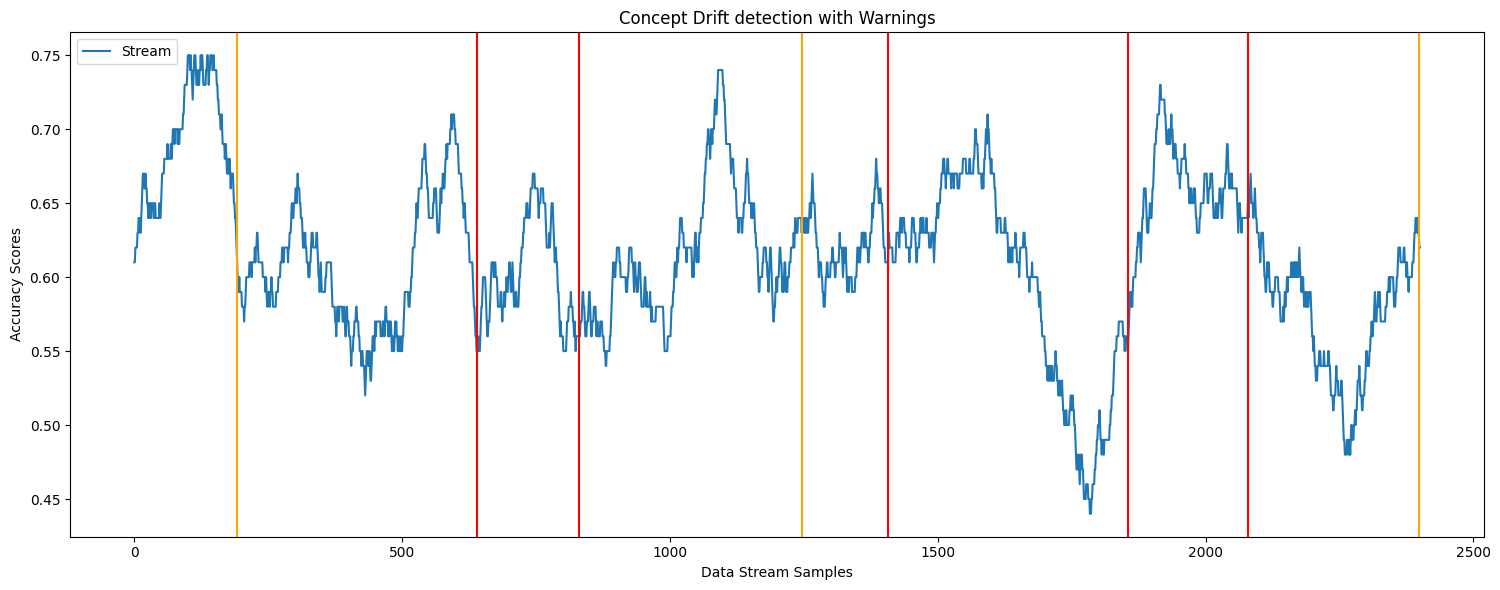

In [12]:
def plot_data(data_stream,drifts=None, warnings=None):
    fig = plt.figure(figsize=(20,6), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax = plt.subplot(gs[0])
    ax.plot(data_stream, label='Stream')
    if drifts is not None:
        for drift_detected in drifts:
            ax.axvline(drift_detected, color='red')
    if warnings is not None:
        for warnings_detected in warnings:
            ax.axvline(warnings_detected, color='orange')
    plt.xlabel('Data Stream Samples')
    plt.ylabel('Accuracy Scores')
    plt.title('Concept Drift detection with Warnings')
    plt.legend()
    plt.show()
    plt.show()

plot_data(new_data_stream1, drifts1, warnings1)

In [13]:
# Initialize Dataset
dataset = datasets.synth.Agrawal(
     classification_function=5,
     seed=42
)

# Load model pickle file
LRmodel = pickle.load(open('../saved_models/classification/model.pkl', 'rb'))

# Initialize Warning and Drift detectors
warning_detector = drift.ADWIN(delta=1.5)
drift_detector = drift.ADWIN(delta=1)

# Lists to store drifts, warnings and correctly_classified_data
drifts2, warnings2, correctly_classified_data2 = list(), list(), list()

# Initialize metrics
metric = metrics.Accuracy()

# Taking 20000 samples
for i,data in enumerate(dataset.take(20000)):
    y_pred = LRmodel.predict_one(data[0])
    correctly_classified = y_pred==data[1]  # checking accuracy
    correctly_classified_data2.append(correctly_classified)
    warning_detector.update(correctly_classified)   # Data is processed one sample at a time
    if warning_detector.drift_detected:
        # The Warning detector indicates after each sample if there is a drift in the data
        print(f'Warning detected at index {i}')
        warnings2.append(i)
    drift_detector.update(correctly_classified)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Drift detected at index {i}')
        drifts2.append(i)

Warning detected at index 191
Drift detected at index 639
Drift detected at index 831
Warning detected at index 1247
Drift detected at index 1407
Drift detected at index 1855
Drift detected at index 2079
Warning detected at index 2399
Warning detected at index 6623
Warning detected at index 7295
Warning detected at index 7551
Warning detected at index 8063
Warning detected at index 8831
Warning detected at index 8991
Warning detected at index 9727
Warning detected at index 10047
Warning detected at index 10271
Warning detected at index 10655
Warning detected at index 13567
Warning detected at index 13631
Warning detected at index 14399
Warning detected at index 14591
Warning detected at index 16031
Warning detected at index 16831
Warning detected at index 17471
Warning detected at index 18431


In [14]:
new_data_stream2 = moving_average(correctly_classified_data2,100)

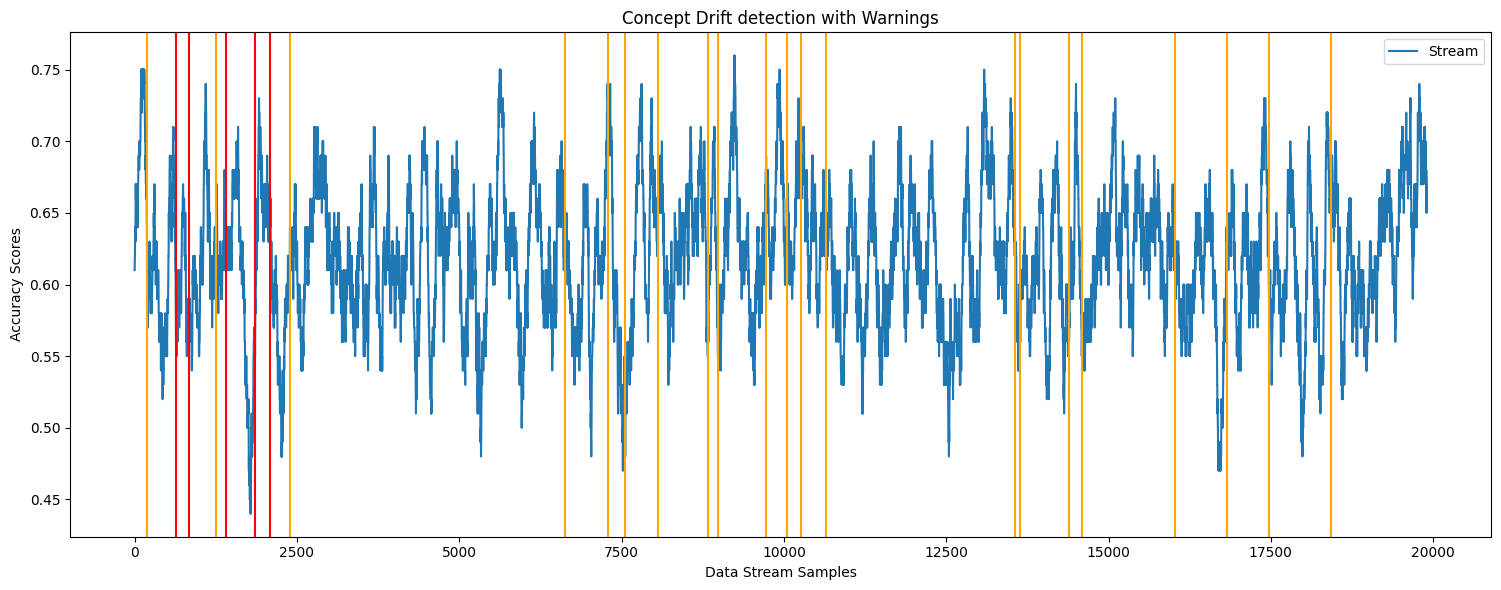

In [15]:
plot_data(new_data_stream2, drifts2, warnings2)